In [4]:
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten, Dense
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import accuracy_score
nc = 10 # Number of classes

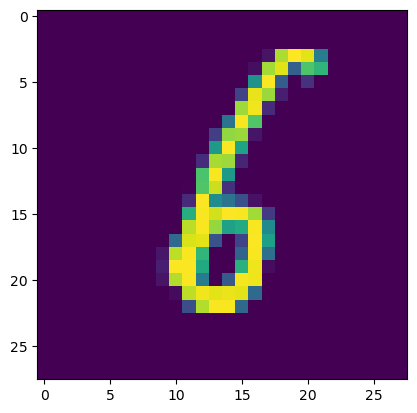

In [5]:
#MNIST dataset will be used that is packaged as part of the TensorFlow installation. 
#This MNIST dataset is a set of 28×28 pixel grayscale images which represent 
#hand-written digits.  It has 60,000 training rows, 10,000 testing rows, 
#and 5,000 validation rows. It is a very common, basic, image classification 
#dataset that is used in machine learning.
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

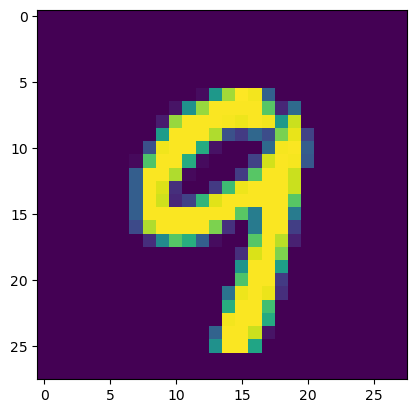

In [6]:
plt.figure(2)
imgplot2 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()


In [7]:
Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytestEnc = tf.one_hot(ytest, depth=nc)

In [8]:
model= Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(Xtrain,ytrainEnc,validation_data=(Xtest,ytestEnc),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2822 - accuracy: 0.9454 - val_loss: 0.0915 - val_accuracy: 0.9706
Epoch 2/3
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.0852 - val_accuracy: 0.9746
Epoch 3/3
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0878 - val_accuracy: 0.9739


In [9]:
ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)
score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

313/313 [==============================] - 2s 6ms/step
Accuracy score is 97.39 %


ADDING A FUNCTION TO DISPLAY THE OUTPUT IN IMAGES/VISUALIZATION OF THE PREDICTED OUTPUT COMPARED TO THE TRUE LABEL

In [10]:
# Evaluate the model
ypred = model.predict(Xtest)
ypred_labels = np.argmax(ypred, axis=1)


313/313 [==============================] - 2s 6ms/step


In [34]:
def visualize_results(X, y_true, y_pred, num_samples=5,rows=5,cols=2):
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_true[i]}')
        plt.axis('off')
    plt.show()

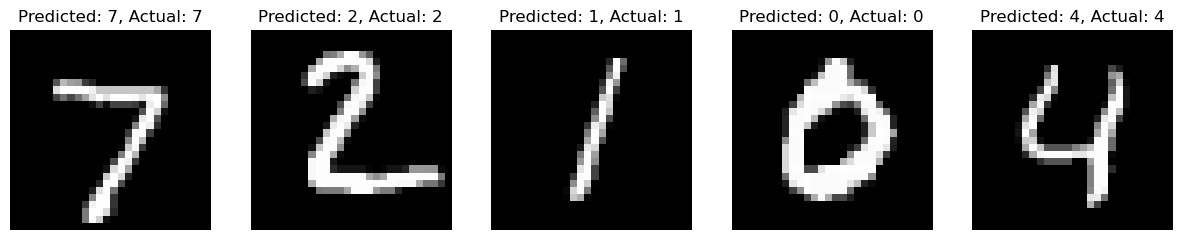

In [36]:
# Display visualization
visualize_results(Xtest, ytest, ypred_labels, num_samples=5)

In [37]:
# Calculate accuracy
accuracy = accuracy_score(ypred_labels, ytest)
print('Accuracy score is', 100 * accuracy, '%')

Accuracy score is 97.39 %
